In [1]:
%matplotlib inline
import morphs
import numpy as np
import matplotlib.pyplot as plt

from morphs.utils.spikes import create_neural_rep

/usr/local/anaconda/envs/morphs/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Figure notes:
- Spectrogram
- waveform
- for a given unit, raster
- for a given unit, several motif templates
- color bar representation
- morph from a to b, b to c, ... etc
Removed
- for a given recording/for all units, smoothed FR

In [2]:
# selected figure parameters
clusterID = 1
motifs = 'abfh'

In [3]:
accuracies, cluster_accuracies = morphs.load.cluster_accuracies()
good_recs = morphs.data.accuracies.good_recs()

In [4]:
# try to find nice block used below, else use last one found
for block_path in morphs.paths.blocks():
    if 'Pen01_Lft_AP2500_ML750__Site04_Z2300__B1101_cat_P01_S04_3' in block_path:
        break
subj = morphs.data.parse.bird_id(block_path)
good_clusters = morphs.data.accuracies.good_clusters(block_path)

In [5]:
spikes = morphs.load.ephys_data(block_path, good_clusters=good_clusters, collapse_endpoints=True)
morphs.data.parse.stim_id(spikes)

In [6]:
cluster_group = spikes[spikes['end']].groupby('cluster').get_group(clusterID)
motif_grouping = cluster_group.groupby('stim_id')
t = np.linspace(-.2, .6, 1000)

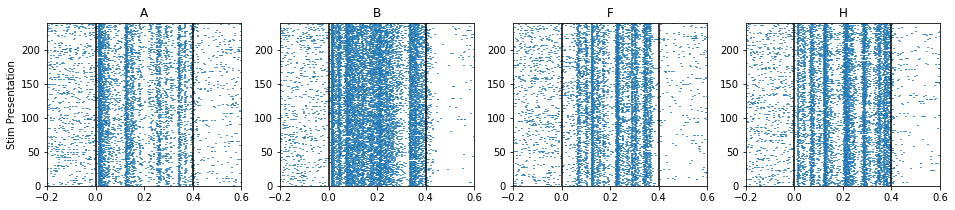

In [7]:
# Rasters
f, axes = plt.subplots(1, len(motifs), figsize=(len(motifs) * 4, 3), squeeze=True)
ax_map = {m:ax for m, ax in zip(motifs, axes)}
for motif in ax_map:
    motif_group = motif_grouping.get_group(motif)
    ax = ax_map[motif]
    ax.eventplot([pres_group.values for pres, pres_group in motif_group.groupby('stim_presentation')["stim_aligned_time"]], alpha=1)
    ax.set_xlim(-0.2, .6)
    ax.set_ylim(0, len(motif_group['stim_presentation'].unique()))
    ax.axvline(0, color='k')
    ax.axvline(0.4, color='k')
    ax.set_title(motif.upper())
axes[0].set_ylabel('Stim Presentation');

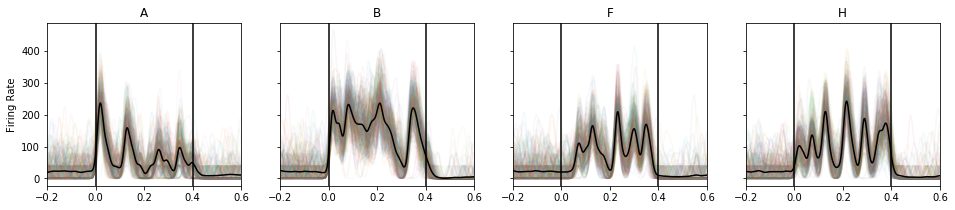

In [8]:
# PSTHs
f, axes = plt.subplots(1, len(motifs), figsize=(len(motifs) * 4, 3), sharey=True, squeeze=True)
ax_map = {m:ax for m, ax in zip(motifs, axes)}
for motif in ax_map:
    motif_group = motif_grouping.get_group(motif)
    ax = ax_map[motif]
    X, _ = create_neural_rep(motif_group, t=t)
    ax.plot(t, X.T, alpha=.05);
    ax.plot(t, np.mean(X.T, axis=1), 'k');
    ax.set_xlim(-0.2, .6)
    ax.axvline(0, color='k')
    ax.axvline(0.4, color='k')
    ax.set_title(motif.upper())
axes[0].set_ylabel('Firing Rate');

In [9]:
spikes = morphs.load.ephys_data(block_path, good_clusters=good_clusters)
morphs.data.parse.stim_id(spikes)

In [10]:
cluster_group = spikes.groupby('cluster').get_group(clusterID)

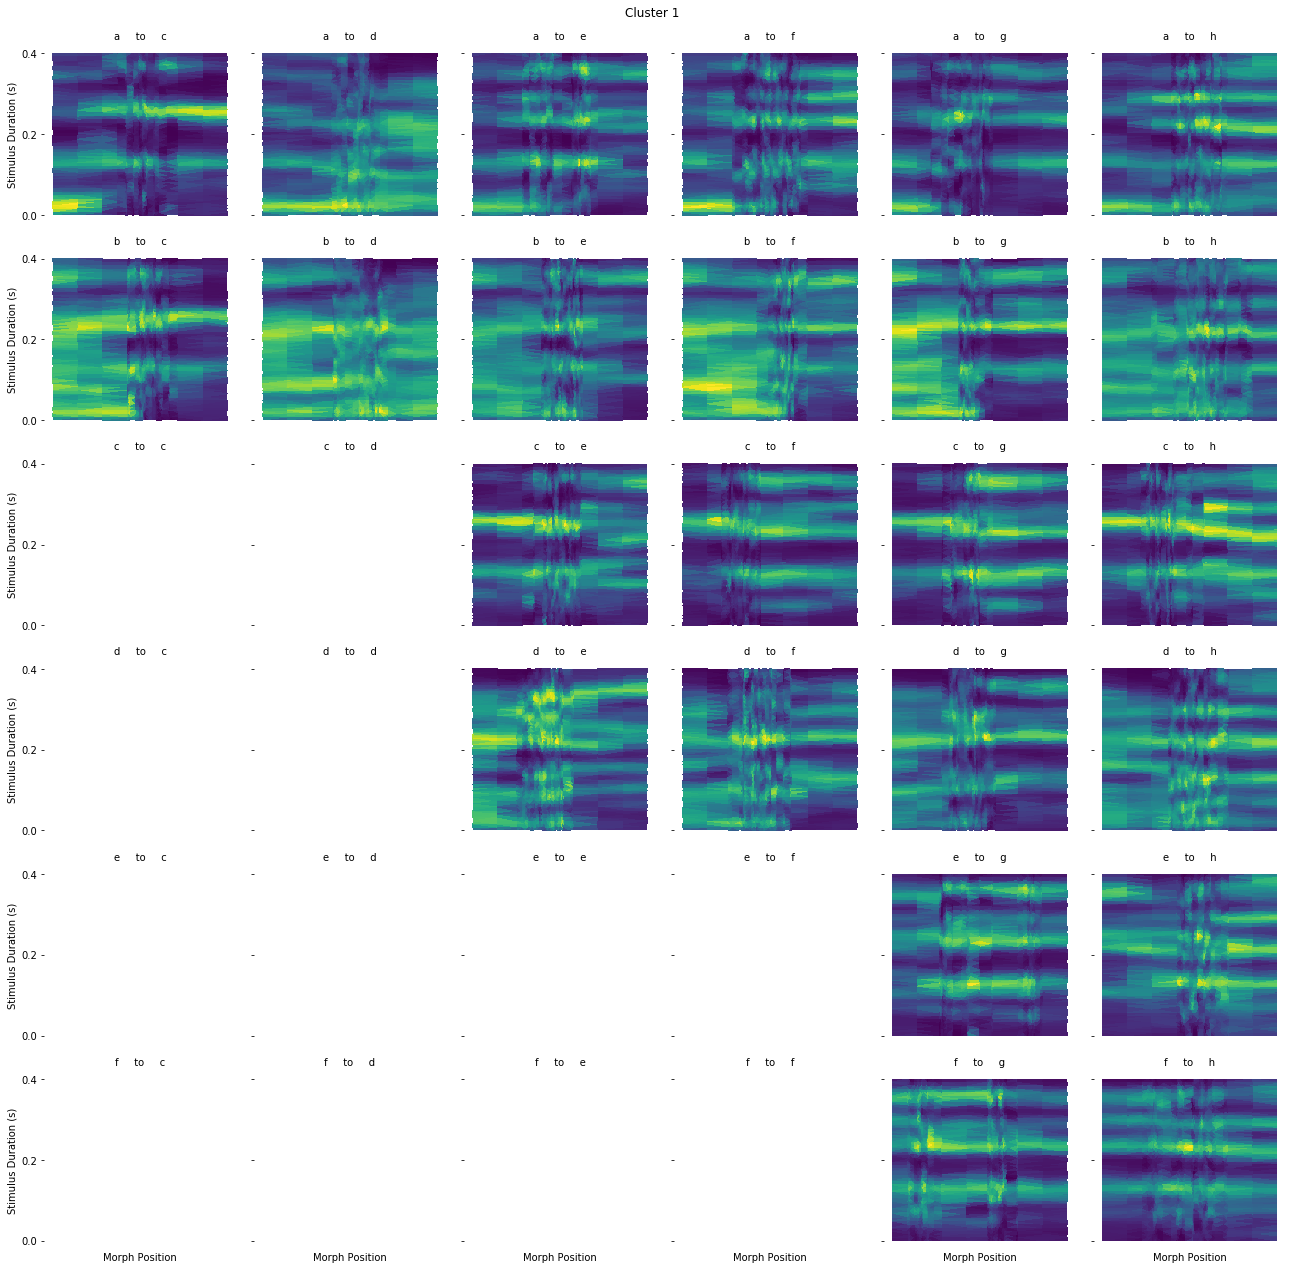

In [11]:
morphs.plot.singleunit.morph_viz(cluster_group, title='Cluster {}'.format(clusterID))

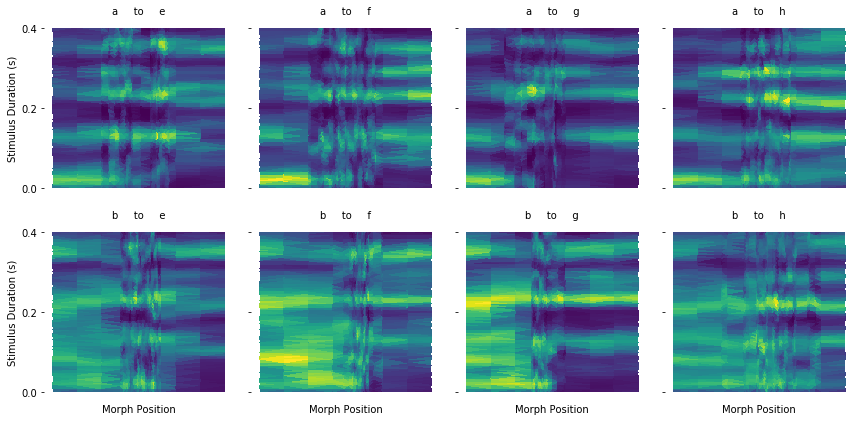

In [12]:
morphs.plot.singleunit.morph_viz(cluster_group, row_order='ab', col_order='efgh')

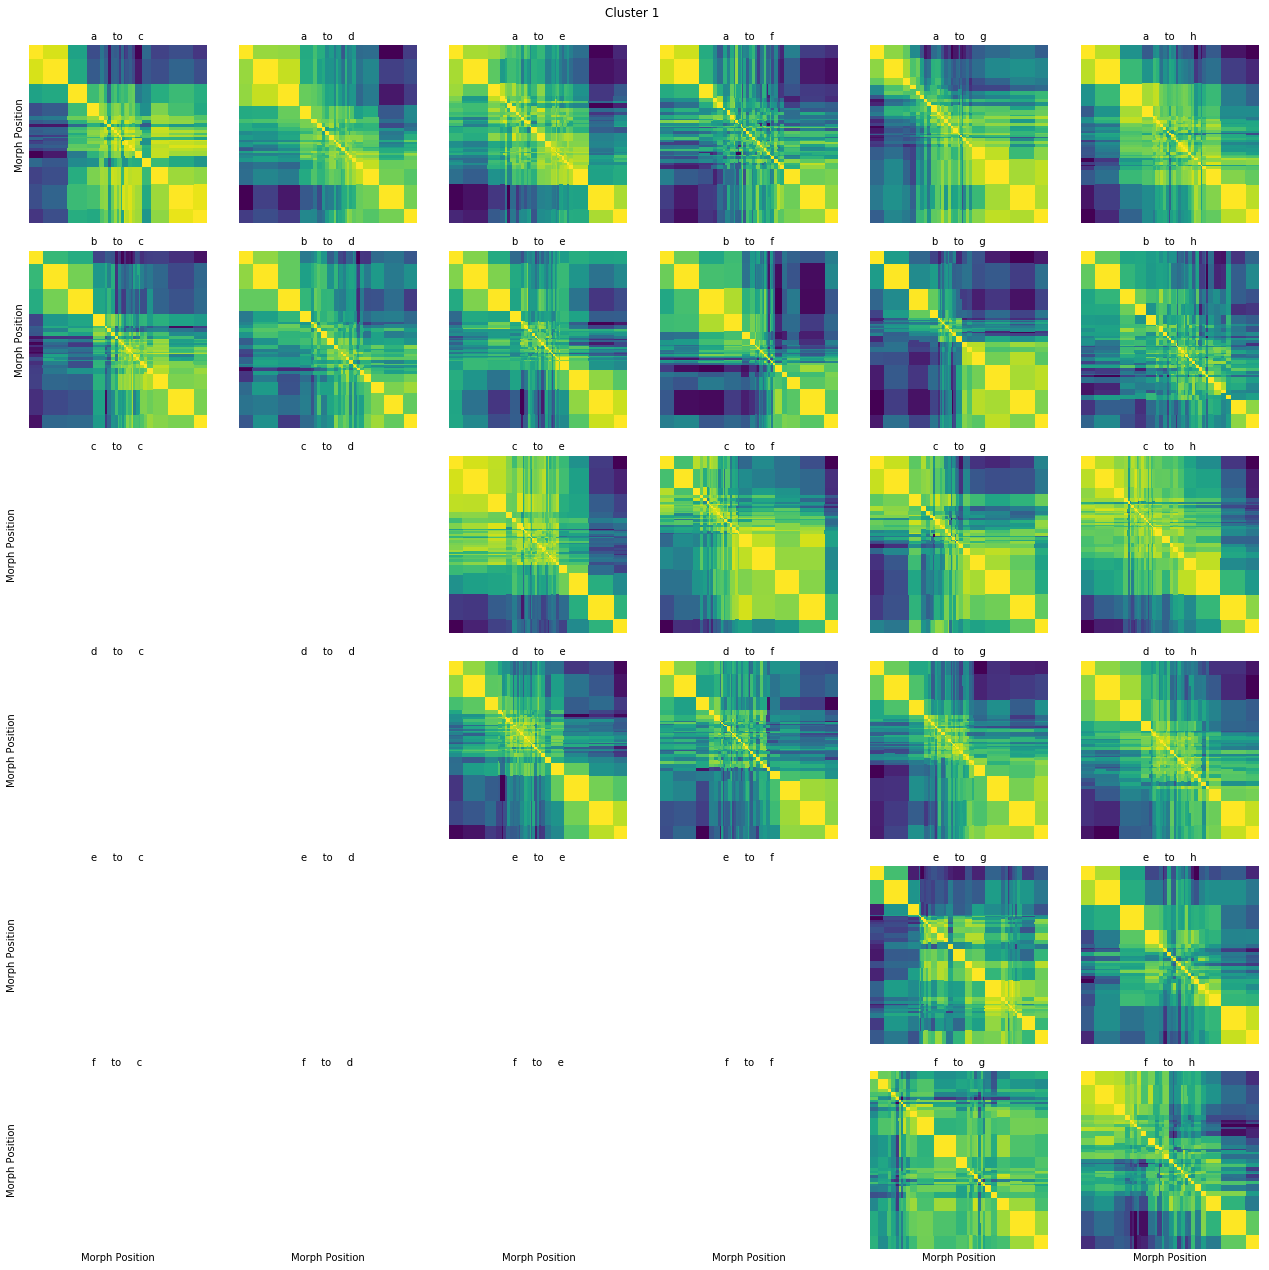

In [13]:
morphs.plot.singleunit.morph_xcor_viz(cluster_group, title='Cluster {}'.format(clusterID))

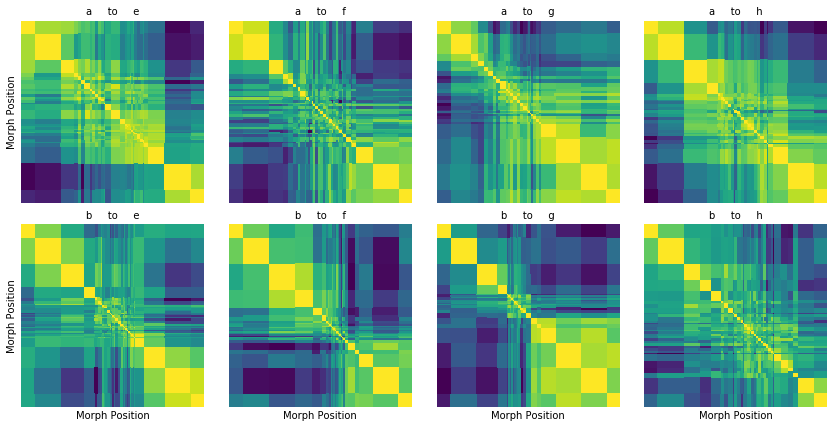

In [14]:
morphs.plot.singleunit.morph_xcor_viz(cluster_group, row_order='ab', col_order='efgh')